In [1]:
%matplotlib inline

In [2]:
import math
import random
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats, integrate

In [3]:
from traffic_simulation import *

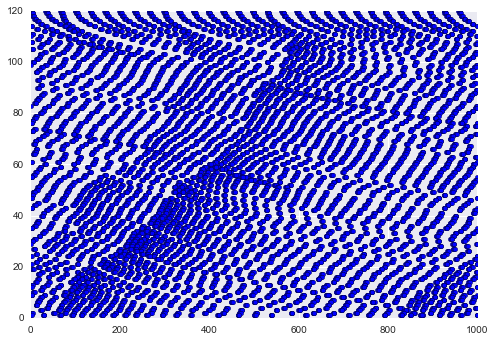

In [4]:
tron.plot_traffic(tron.get_location(33, 120))

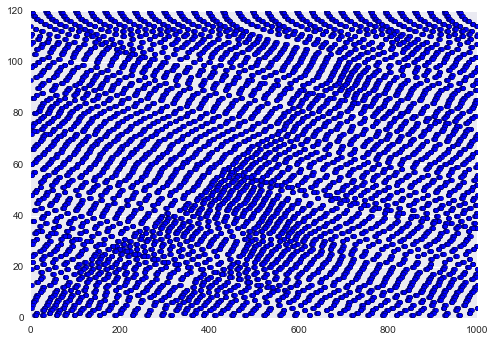

In [5]:
tron.plot_traffic(tron.get_location(30, 120))

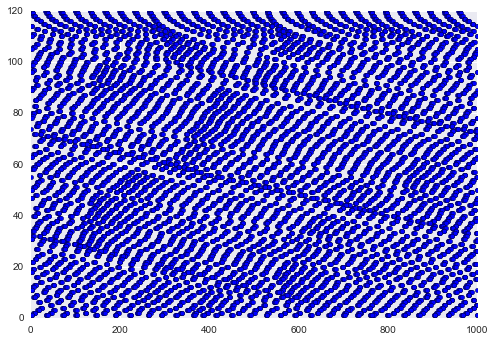

In [6]:
tron.plot_traffic(tron.get_location(27, 120))

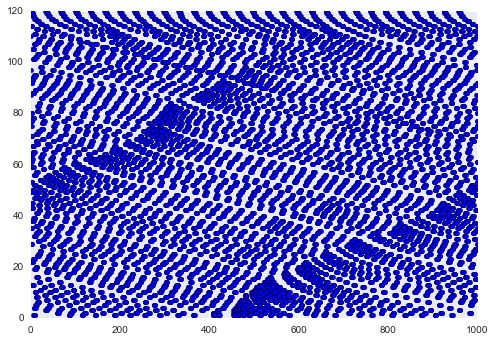

In [7]:
tron.plot_traffic(tron.get_location(25, 120))

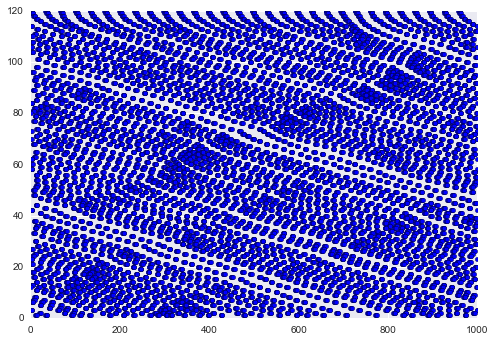

In [8]:
tron.plot_traffic(tron.get_location(20, 120))

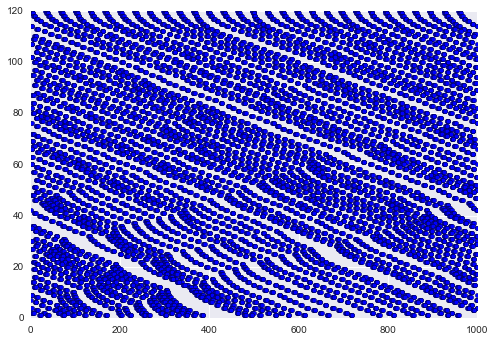

In [9]:
tron.plot_traffic(tron.get_location(15, 120))

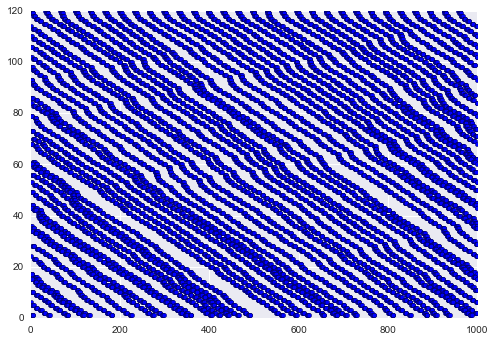

In [10]:
tron.plot_traffic(tron.get_location(10, 120))

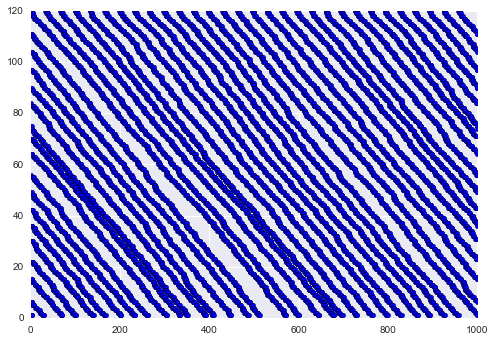

In [11]:
tron.plot_traffic(tron.get_location(5, 120))

In [15]:
tronss = Simulation(range(20,33), 60, 100)

In [16]:
speeds_list, average_speeds_list = tronss.full_monte()

In [17]:
print(average_speeds_list)

[[16.01, 15.68, 13.88, 16.13, 16.43, 16.41, 16.37, 15.27, 16.07, 15.79, 16.37, 16.15, 16.09, 15.58, 15.17, 15.97, 16.36, 16.05, 16.47, 16.03, 16.3, 16.15, 15.91, 15.48, 14.83, 15.19, 15.98, 16.64, 16.3, 16.06, 16.51, 15.92, 15.81, 15.36, 15.07, 15.88, 15.96, 16.46, 16.26, 15.42, 15.55, 15.72, 15.77, 15.57, 15.4, 15.78, 15.25, 16.37, 15.46, 16.23, 15.77, 15.95, 16.43, 15.48, 15.45, 16.06, 16.19, 16.57, 15.42, 16.39, 16.27, 15.57, 14.7, 16.64, 15.95, 15.76, 15.39, 16.33, 16.45, 15.71, 16.0, 14.83, 15.3, 15.83, 16.41, 16.23, 16.15, 16.55, 16.14, 16.4, 15.06, 16.58, 15.6, 16.07, 16.1, 16.39, 15.32, 14.0, 15.61, 16.15, 15.7, 16.44, 16.31, 15.47, 15.76, 15.52, 16.32, 15.7, 16.63, 15.36, 17.52, 16.53, 17.84, 18.18, 16.87, 17.3, 18.08, 16.16, 16.99, 17.95, 17.18, 17.92, 16.38, 17.16, 17.21, 16.86, 17.76, 18.23, 17.8, 17.01, 17.15, 17.86, 16.9, 17.03, 17.56, 17.8, 17.37, 17.85, 17.28, 16.6, 16.81, 16.63, 16.86, 17.29, 18.01, 17.68, 17.33, 16.99, 17.32, 17.47, 17.53, 17.43, 17.44, 16.01, 17.74, 